In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [15]:
import numpy as np

In [16]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [17]:
len(X_train),len(X_test)

(60000, 10000)

In [18]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

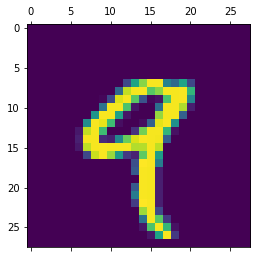

In [19]:
plt.matshow(X_train[4])

In [20]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
Y_train[4]

9

In [22]:
X_train=X_train/255
X_test=X_test/255           #do this to get all inpute between 0 and 1

In [23]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flattened[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #for integer
             metrics=['accuracy'])
model.fit(X_train_flattened,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9836


In [28]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9720


[0.09246942400932312, 0.972000002861023]

Text(69.0, 0.5, 'Truth')

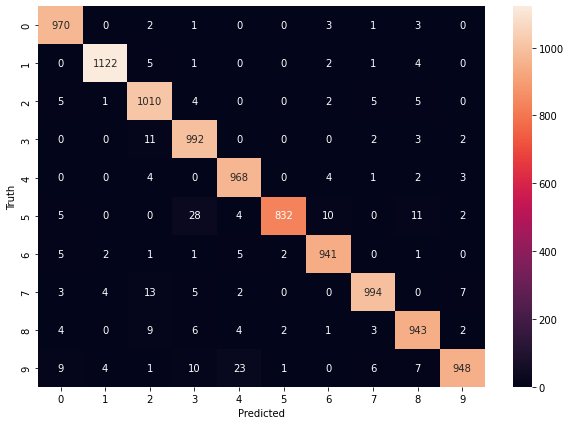

In [31]:
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2772 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1282 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [36]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9766


[0.08279267698526382, 0.9765999913215637]